In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"1a38f048-c694-4a07-9902-ed8d45cdfea1\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Exploring the Gender Wage Gap: The Impact of Educational Attainment and Leadership Roles in the Business Sector\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

## Introduction

The gender wage gap remains a persistent issue in labor markets worldwide, raising critical questions about the underlying factors contributing to salary disparities between men and women. Among these factors, educational attainment and occupational roles are of particular importance in understanding how systemic inequities manifest in workplace outcomes. This research investigates how gender and educational attainment, specifically the highest degree type, interact to influence salary outcomes. It also examines the role of degree types and leadership roles in shaping the gender wage gap.

Educational attainment is often cited as a key driver of economic mobility, yet significant gender disparities exist in how different degrees translate into salary outcomes. For example, women are more likely to pursue degrees in fields with traditionally lower earning potential, while men tend to dominate in higher-paying fields such as engineering and technology. Moreover, occupational roles, especially in leadership or management positions, play a crucial role in defining earning trajectories. Women, despite achieving similar or higher levels of education compared to men, remain underrepresented in these roles, further increasing the wage gap.

This study aims to explore the intersection of gender and highest degree level at Bachelor's to explain salary disparities and analyze how Bachelor's degrees differ in leadership roles contributing to these inequalities. This will focus on leadership roles in particularly the business sector, as business tends to be a male dominated field. This research seeks to uncover the structural and societal factors that perpetuate the gender wage gap. 

Understanding these dynamics is crucial for addressing systemic inequalities and fostering a more equitable labor market where educational attainment and career choices lead to fair compensation for all, regardless of gender.

## Research Question

How do **gender** and **educational attainment at the Bachelor's degree level** influence salary outcomes within the **business sector**, and what is the interaction between gender and Bachelor's degree attainment in explaining salary disparities? Additionally, how do gender differences in occupational roles within the business sector contribute to the gender wage gap, particularly among highly paid or leadership positions?



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [ ]:
# import jinja2
# raw_query = """
#     select * from nscg_2021.csv
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select
#         cast(salary as int) as salary, --capped at 9999996 - As of the week of February 1, 2021, what was your basic annual salary on your principal job, before deductions?
#         if (
#             cast(wkswk as int) = 98,
#             null,
#             cast(wkswk as int)
#         ) as wkswk, --Principal job salary: weeks per year basis; 98 is a logical skip
#         if (
#             cast(earn as int) = 9999998,
#             null,
#             cast(earn as int)
#         ) as earn, --capped at 9999996 Total earned income before deductions in previous year so need to also select those who worked last year
#         supwk,  --Supervised others in principal job indicator
#         wamgmt, --Work activity on principal job 10% indicator managing or supervising people/project
#         case
#             when
#                 cast(supdir as int) = 9998
#                 then null
#             else cast(supdir as int)
#         end as supdir,
#         case
#             when
#                 cast(supind as int) = 99998
#                 then null
#             else cast(supind as int)
#         end as supind,
#         case
#             when cast(emsmi as int) = 1
#                 then 'same_employer_same_job'
#             when cast(emsmi as int) = 2
#                 then 'same_employer_different_job'
#             when cast(emsmi as int) = 3
#                 then 'different_employer_same_job'
#             when cast(emsmi as int) = 4
#                 then 'different_employer_different_job'
#             else null
#         end as emsmi,  --During these two time periods - the week of February 1, 2019, and the week of February 1, 2021 were you working for?
#         if(
#             gender = 'F',
#             1,
#             0
#         )
#         as gender,
#         white,
#         case
#             when cast(racethm as int) = 1
#                 then 'asian'
#             when cast(racethm as int) = 2
#                 then 'american_indian_alaskan'
#             when cast(racethm as int) = 3
#                 then 'black'
#             when cast(racethm as int) = 4
#                 then 'hispanic'
#             when cast(racethm as int) = 5
#                 then 'white'
#             when cast(racethm as int) = 6
#                 then 'pacific_islander'
#             when cast(racethm as int) = 7
#                 then 'multiple_race_non_hispanic'
#             end as racethm,
#         case
#             when resploc = '01'
#                 then 'new_england'
#             when resploc = '02'
#                 then 'middle_atlantic'  
#             when resploc = '03'
#                 then 'east_north_central'
#             when resploc = '04'
#                 then 'west_north_central' 
#             when resploc = '05'
#                 then 'south_atlantic'
#             when resploc = '06'
#                 then 'east_south_central' 
#             when resploc = '07'
#                 then 'west_south_central'
#             when resploc = '08'
#                 then 'mountain'
#             when resploc = '09'
#                 then 'pacific_us_territories'
#             when resploc = '10'
#                 then 'europe'
#             when resploc = '20'
#                 then 'asia'
#             when resploc = '33'
#                 then 'caribbean'
#             when resploc = '37'
#                 then 'south_america'
#             when resploc = '40'
#                 then 'africa'
#             when resploc = '55'
#                 then 'abroad_unspecified'
#             end as resploc,
#         ctzusin, --us citizen
#         cast(refyr as int) as refyr, --year of survey
#         cast(biryr as int) as biryr, --birth year
#         agegr, --Age Group (5 year intervals)
#         cast(strtyr as int) as strtyr, --Year principal job started
#         prmbr, --Number of professional society memberships
#         promtgi, -- attended prof meetings
#         wktrni, -- attended trainings
#         if (cast(hrswk as int) = 98,
#             null,
#             hrswk) as hrswk, --capped at 96 hours a week
#         case
#             when cast(n2ocprbg as int) = 1
#                 then 'S&E'
#             when cast(n2ocprbg as int) = 2
#                 then 'S&E_related'
#             when cast(n2ocprbg as int) = 3
#                 then 'non_S&E'
#             else null
#             end as n2ocprbg, --Job code for principal job broad group SE based
#         case
#             when cast(n2ocprmg as int) = 1
#                 then 'computer_scientists'
#             when cast(n2ocprmg as int) = 2
#                 then 'bio_life_scientists'
#             when cast(n2ocprmg as int) = 3
#                 then 'physical_scientists_related'
#             when cast(n2ocprmg as int) = 4
#                 then 'social_scientists_related'
#             when cast(n2ocprmg as int) = 5
#                 then 'engineers'
#             when cast(n2ocprmg as int) = 6
#                 then 'S&E_related_occupations'
#             when cast(n2ocprmg as int) = 7
#                 then 'non-S&E_occupations'
#             else null
#             end as occupation_group,
#         n3ocpr, --Job code for principal job best code, includes Top-level managers, execs, admins (711410) and OTHER mid-level managers (711470)
#         case when 
#             n3ocpr in (621420, 621430,621440, 621450, 711460, 711470) 
#                 then 'mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_codes,
#         case when 
#             n3ocpr = 621420
#                 then 'computer_it_managers'
#             when n3ocpr = 621430
#                 then 'eng_managers'
#             when n3ocpr = 621440
#                 then 'medical_health_manager'
#             when n3ocpr = 621450
#                 then 'natural_science_manager'
#             when n3ocpr = 711460
#                 then 'ed_administrators'
#             when n3ocpr = 711470
#                 then 'other_mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_titles,
#         case 
#             when cast(n3ocprng as int) = 11 then 'computer_information_scientists' 
#             when cast(n3ocprng as int) = 12 then 'mathematical_scientists'
#             when cast(n3ocprng as int) = 18 then 'postsecondary teachers_computer_and_math'
#             when cast(n3ocprng as int) = 21 then 'agricultural_food_scientists'
#             when cast(n3ocprng as int) = 22 then 'biological_medical_scientists' 
#             when cast(n3ocprng as int) = 23 then 'environmental_life_scientists'
#             when cast(n3ocprng as int) = 28 then 'postsecondary_teachers_life_related_sciences'
#             when cast(n3ocprng as int) = 31 then 'chemists_except_biochemists'
#             when cast(n3ocprng as int) = 32 then 'earth_atmospheric_ocean_scientists'
#             when cast(n3ocprng as int) = 33 then 'physicists'
#             when cast(n3ocprng as int) = 34 then 'other_physical_related_scientists'
#             when cast(n3ocprng as int) = 38 then 'postsecondary_teachers_physical_and_related_sciences'
#             when cast(n3ocprng as int) = 41 then 'economists'
#             when cast(n3ocprng as int) = 42 then 'political_scientists'
#             when cast(n3ocprng as int) = 43 then 'psychologists'
#             when cast(n3ocprng as int) = 44 then 'anthropologists'
#             when cast(n3ocprng as int) = 45 then 'other_social_related_scientists'
#             when cast(n3ocprng as int) = 48 then 'postsecondary_teachers_social_related_sciences'
#             when cast(n3ocprng as int) = 51 then 'aerospace_aeronautical_astronautical_engineers'
#             when cast(n3ocprng as int) = 52 then 'chemical_engineers'
#             when cast(n3ocprng as int) = 53 then 'civil_architectural_sanitary_engineers'
#             when cast(n3ocprng as int) = 54 then 'electrical_computer_hardware_engineers'
#             when cast(n3ocprng as int) = 55 then 'industrial_engineers'
#             when cast(n3ocprng as int) = 56 then 'mechanical_engineers'
#             when cast(n3ocprng as int) = 57 then 'other_engineers'
#             when cast(n3ocprng as int) = 58 then 'postsecondary_teachers_engineering'
#             when cast(n3ocprng as int) = 61 then 'health_related_occupations'
#             when cast(n3ocprng as int) = 62 then 'S&E_managers'
#             when cast(n3ocprng as int) = 63 then 'S&E_pre_college_teachers'
#             when cast(n3ocprng as int) = 64 then 'S&E_technicians_and_technologists'
#             when cast(n3ocprng as int) = 65 then 'other_S&E_related_occupations'
#             when cast(n3ocprng as int) = 71 then 'non_S&E_managers'
#             when cast(n3ocprng as int) = 72 then 'management_related_occupations' 
#             when cast(n3ocprng as int) = 73 then 'non_S&E_precollege_teachers'
#             when cast(n3ocprng as int) = 74 then 'non_S&E_postsecondary_teachers' 
#             when cast(n3ocprng as int) = 75 then 'social_services_related_occupations' 
#             when cast(n3ocprng as int) = 76 then 'sales_marketing_occupations' 
#             when cast(n3ocprng as int) = 77 then 'art_humanities_related_occupations' 
#             when cast(n3ocprng as int) = 78 then 'other_non_S&E_occupations' 
#             else null
#             end as principal_job,
#         case
#             when wapri = '01'
#             then 'accounting_finance_contracts'
#             when wapri = '02'
#             then 'basic_research'
#             when wapri = '03'
#             then 'applied_research'
#             when wapri = '04'
#             then 'reasearch_dev_materials_devices'
#             when wapri = '05'
#             then 'design_equipment_processes_structures_models'
#             when wapri = '06'
#             then 'computer_apps_programming_systems_dev'
#             when wapri = '07'
#             then 'human_resources'
#             when wapri = '08'
#             then 'managing_supervising_people_projects'
#             when wapri = '09'
#             then 'production_operations_maintenance'
#             when wapri = '10'
#             then 'professional_services'
#             when wapri = '11'
#             then 'sales_purchasing_marketing'
#             when wapri = '12'
#             then 'quality_productivity_management'
#             when wapri = '13'
#             then 'teaching'
#             when wapri = '14'
#             then 'other_work_activity'
#             else null
#             end as wapri,  --Work activity spent most hours on in principal job - like dept
#         wasec,  --Work activity spent second most hours on in principal job
#         newbus, --within 5 years founded
#         case
#             when cast(nedtp as int) = 1 then 'self_employed_not_incorp'
#             when cast(nedtp as int) = 2 then 'self_employed_incorp'
#             when cast(nedtp as int) = 3 then 'private_for_profit_org'
#             when cast(nedtp as int) = 4 then 'private_not_for_profit_org'
#             when cast(nedtp as int) = 5 then 'local_government'
#             when cast(nedtp as int) = 6 then 'state_government'
#             when cast(nedtp as int) = 7 then 'military'
#             when cast(nedtp as int) = 8 then 'federal_government'
#             when cast(nedtp as int) = 9 then 'other_employer_type'
#         else null
#         end as employer_type,
#         case
#             when cast(emsecsm as int) = 1 then 'educational_institutution'
#             when cast(emsecsm as int) = 2 then 'government'
#             when cast(emsecsm as int) = 3 then 'business'
#         else null
#         end as sector, -- Employer sector --1: Educational Institution 2: Government 3: Business/Industry
#         case when 
#             emsize = 1
#             then '10_or_fewer_employees'
#         when emsize = 2
#             then '11_to_24_employees'
#         when emsize = 3
#             then '25_to_99_employees'
#         when emsize = 4
#             then '100_to_499_employees'
#         when emsize = 5
#             then '500_to_999_employees'
#         when emsize = 6
#             then '1000_to_4999_employees'
#         when emsize = 7
#             then '5000_to_24999_employees'
#         when emsize = 8
#             then '25000+_employees'
#         else null
#         end as emsize,
#         case 
#         when emsize = 1
#             then 10
#         when emsize = 2
#             then round(11 + (24-11)/2)
#         when emsize = 3
#             then round(25 + (99-25)/2)
#         when emsize = 4
#             then round(100 + (499-100)/2)
#         when emsize = 5
#             then round(500 + (999-500)/2)
#         when emsize = 6
#             then round(1000 + (4999-1000)/2)
#         when emsize = 7
#             then round(5000 + (24999-5000)/2)
#         when emsize = 8
#             then 25000
#         else null
#         end as emsize_midpoint,
#         case
#             when emrg = '01'
#                 then 'new_england'
#             when emrg = '02'
#                 then 'middle_atlantic'  
#             when emrg = '03'
#                 then 'east_north_central'
#             when emrg = '04'
#                 then 'west_north_central' 
#             when emrg = '05'
#                 then 'south_atlantic'
#             when emrg = '06'
#                 then 'east_south_central' 
#             when emrg = '07'
#                 then 'west_south_central'
#             when emrg = '08'
#                 then 'mountain'
#             when emrg = '09'
#                 then 'pacific_us_territories'
#             when emrg = '10'
#                 then 'europe'
#             when emrg = '20'
#                 then 'asia'
#             when emrg = '33'
#                 then 'caribbean'
#             when emrg = '37'
#                 then 'south_america'
#             when emrg = '40'
#                 then 'africa'
#             else null 
#             end as emrg,
#         case when
#             emst = '085' then 'new_england'
#             when emst = '086' then 'mid_atlantic'
#             when emst = '087' then 'east_north_central'
#             when emst = '088' then 'west_north_central'
#             when emst = '089' then 'south_atlantic'
#             when emst = '090' then 'east_south_central'
#             when emst = '091' then 'west_south_central'
#             when emst = '092' then 'mountain'
#             when emst = '093' then 'pacific_region'
#             when emst = '096' then 'not_specified'
#             else null
#         end as emst,
#         case
#             when cast(jobsatis as int) = 1
#                 then 'very_satisfied'
#             when cast(jobsatis as int) = 2
#                 then 'somewhat_satisfied'
#             when cast(jobsatis as int) = 3
#                 then 'somewhat_dissatisfied'
#             when cast(jobsatis as int) = 4
#                 then 'very_dissatisfied'
#             end as jobsatis,
#         case
#             when
#                 cast(wkslyr as int) = 98 --logical skip
#                 then 52 
#             else cast(wkslyr as int)
#         end as wkslyr, --Number of weeks worked per year if less than 52 weeks
#         cast(refyr as int) - cast(strtyr as int) as years_at_job,
#         case
#             when
#                 wksyr = 1 --Was this salary based on a 52-week year, or less than that? 1 = worked 52 weeks per year
#                 then 1
#             else 0
#         end as fiftytwo_wksyr,
#         cast(refyr as int) - cast(dgryr as int) as years_since_highest_degree,
#         cast(refyr as int) - cast(mryr as int) as years_since_most_recent_degree,
#         cast(refyr as int) - cast(bayr as int) as years_since_first_ba,
#         cast(bsdgn as int) as bsdgn, --Number of bachelor's or higher degrees
#         cast(bayr as int) as bayr,
#         baind, --Indicator of whether respondent received a BA-level degree
#         hdcarn,
#         n2dgrmed, -- Field of study for highest degree - best code
#         ndgmebg, --Field of study for highest degree broad group - SE based
#         case 
#         when n2dgrmed like '116%'
#             then 'computer_and_info_sciences'
#         when n2dgrmed like '128%'
#             then 'math'
#         when n2dgrmed like '216%'
#             then 'agricultural_sciences'    
#         when n2dgrmed like '226%'
#             then 'biological_sciences'
#         when n2dgrmed like '236%'
#             then 'environmental_sciences'
#         when n2dgrmed like '318%'
#             then 'chemistry'
#         when n2dgrmed like '328%'
#             then 'geological_sciences'
#         when n2dgrmed like '338%'
#             then 'physics'
#         when n2dgrmed like '348%'
#             then 'other_physical_sciences'
#         when n2dgrmed like '416%'
#             then 'ag_economics'
#         when n2dgrmed like '419%'
#             then 'economics'
#         when n2dgrmed like '429%'
#             then 'political_sciences'
#         when n2dgrmed like '437%'
#             then 'ed_psycholology'
#         when n2dgrmed like '438%'
#             then 'psycholology'
#         when n2dgrmed like '449%'
#             then 'sociology_anthropology'
#         when n2dgrmed like '456%'
#             then 'ethnic_studies'
#         when n2dgrmed like '457%'
#             then 'linguistics'
#         when n2dgrmed like '458%'
#             then 'philosophy'
#         when n2dgrmed like '459%'
#             then 'geography'
#         when n2dgrmed like '517%'
#             then 'aerospace_eng'
#         when n2dgrmed like '527%'
#             then 'chem_eng'
#         when n2dgrmed like '537%'
#             then 'civil_arch_eng'
#         when n2dgrmed like '547%'
#             then 'computer_eng'
#         when n2dgrmed like '557%'
#             then 'industrial_eng'
#         when n2dgrmed like '567%'
#             then 'mechanical_eng'
#         when n2dgrmed like '577%'
#             then 'bio_eng'
#         when n2dgrmed like '617%'
#             then 'health_medical_sciences'
#         when n2dgrmed like '627%'
#             then 'specialized_teacher_education'
#         when n2dgrmed like '636%'
#             then 'computer_programming'
#         when n2dgrmed like '637%'
#             then 'other_eng'
#         when n2dgrmed like '6461%'
#             then 'architects'
#         when n2dgrmed like '6465%'
#             then 'acutuaries'
#         when n2dgrmed like '716%'
#             then 'business_management'
#         when n2dgrmed like '727%'
#             then 'education'
#         when n2dgrmed like '738%'
#             then 'theology'
#         when n2dgrmed like '739%'
#             then 'social_work'
#         when n2dgrmed like '746%'
#             then 'marketing'
#         when n2dgrmed like '757%'
#             then 'literature_language'
#         when n2dgrmed like '758%'
#             then 'liberal_arts'
#         when n2dgrmed like '7592%'
#             then 'history'
#         when n2dgrmed like '7594%'
#             then 'arts'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7668%'
#             then 'conservation'
#         when n2dgrmed like '7669%'
#             then 'criminal_justice'
#         when n2dgrmed like '7680%'
#             then 'home_econ'
#         when n2dgrmed like '7681%'
#             then 'law'
#         when n2dgrmed like '7683%'
#             then 'library_science'        
#         when n2dgrmed like '7685%'
#             then 'parks_and_rec'
#         when n2dgrmed like '7690%'
#             then 'public_admin'
#         when n2dgrmed = '769950'
#             then 'other'
#         else null
#         end as highest_degree_field,
#         case
#             when cast(ndgmemg as int) = 1
#                 then 'computer_math_sciences'
#             when cast(ndgmemg as int) = 2
#                 then 'life_sciences'
#             when cast(ndgmemg as int) = 3
#                 then 'physical_related_sciences'
#             when cast(ndgmemg as int) = 4
#                 then 'social_related_sciences'
#             when cast(ndgmemg as int) = 5
#                 then 'engineering'
#             when cast(ndgmemg as int) = 6
#                 then 'S&E_related_fields'
#             when cast(ndgmemg as int) = 7
#                 then 'non_S&E_fields'
#             end as highest_general_degree_field,
#         ndgmeng, -- Field of study for highest degree minor group
#         case
#             when
#                 dgrdg = 1
#                 then 'Bachelors'
#             when
#                 dgrdg = 2
#                 then 'Masters'
#             when
#                 dgrdg = 3
#                 then 'Doctorate'
#             when
#                 dgrdg = 4
#                 then 'Professional'
#         end as highest_degree_type,
#         spnat, --Technical expertise required by spouse/partner job: engineering, computer, math, natural sciences
#         spot, --Technical expertise required by spouse/partner job: other
#         spsoc, --Technical expertise required by spouse/partner Job: social sciences
#         case 
#             when spowk = 1
#                 then 'full_time'
#             when spowk = 2   
#                 then 'part_time'
#             when spowk = 3   
#                 then 'non_working'   
#             else 'not_partnered' 
#         end as partner_work,
#         marind,
#         case 
#             when cast(marsta as int) = 1
#                 then 'married'
#             when cast(marsta as int) = 2
#                 then 'living_with_partner'
#             when cast(marsta as int) = 3
#                 then 'widowed'
#             when cast(marsta as int) = 4
#                 then 'separated'
#             when cast(marsta as int) = 5
#                 then 'divorced'
#             when cast(marsta as int) = 6
#                 then 'never_married'
#         end as marsta,
#         chlvin, --Children living in household indicator (all ages)
#         CASE 
#             WHEN (CAST(marsta AS int) = 1 OR CAST(marsta AS int) = 2) AND chlvin = 1 THEN 1
#             ELSE 0
#         END AS partnered_with_children,
#         ch6in,
#         chun12, 
#         case
#             when
#                 cast(chu2 as int) = 98
#                 then null
#             else cast(chu2 as int)
#         end as chu2,
#         case
#             when
#                 cast(ch25 as int) = 98
#                 then null
#             else cast(ch25 as int)
#         end as ch25,
#         case
#             when
#                 cast(ch6 as int) = 98
#                 then null
#             else cast(ch6 as int)
#         end as ch6,
#         case
#             when
#                 cast(ch611 as int) = 98
#                 then null
#             else cast(ch611 as int)
#         end as ch611,
#         case
#             when
#                 cast(ch1218 as int) = 98
#                 then null
#             else cast(ch1218 as int)
#         end as ch1218,
#         case
#             when
#                 cast(ch19 as int) = 98
#                 then null
#             else cast(ch19 as int)
#         end as ch19,
#         lfstat,
#         resplcus
#     from df
#     where df.lfstat = 1 --employed workforce
#     and df.resplcus = 1 --respondents in US
#     and baind = 1 --Indicator of whether respondent received a BA-level degree
#     and agegr < 67 -- retirement age
#     and salary > 15080 --minimum wage in dollars per year for full-time workers
#     and earn > 15080
#     --and employer_type = 'private_for_profit_org'
#     and hrswk >=30 -- full time workers
#     and fiftytwo_wksyr = 1 --salary based on 52 weeks worked last year
#     and employer_type not in 
#         (
#         'military',
#         'other_employer_type',
#         'self_employed_not_incorp',
#         'self_employed_incorp'
#         )
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     with average_earnings_by_gender as (
#         select
#             gender,
#             principal_job,
#             sector,
#             round(avg(earn), 2) as average_earnings,
#             count(*) as number_of_respondents
#         from data
#         group by gender, principal_job, sector
#     ),
#     
#     
#     women as (
#         select
#             average_earnings,
#             number_of_respondents as number_female_respondents,
#             principal_job,
#             sector
#         from average_earnings_by_gender
#         where gender = 1
#     ),
#     
#     men as (
#         select
#             average_earnings,
#             number_of_respondents as number_male_respondents,
#             principal_job,
#             sector
#         from average_earnings_by_gender
#         where gender = 0
#     ),
#     
#     percent_female as (
#         select
#             principal_job,
#             sector,
#             avg(gender) as percent_female
#         from data
#         group by principal_job, sector
#     )
#     
#     select * from 
#         (
#             select
#                 women.principal_job,
#                 women.sector,
#                 percent_female,
#                 (
#                     women.number_female_respondents + men.number_male_respondents
#                 ) as total_respondents,
#                 number_female_respondents,
#                 number_male_respondents,
#                 women.average_earnings as average_women_earnings,
#                 men.average_earnings as average_men_earnings,
#                 round(women.average_earnings / men.average_earnings, 2) as gender_earnings_gap
#             from women
#             inner join
#                 men
#                 on
#                     women.principal_job = men.principal_job
#                     and women.sector = men.sector
#             inner join
#                 percent_female
#                 on
#                     women.principal_job = percent_female.principal_job
#                     and women.sector = percent_female.sector
#         ) where total_respondents > 25
#     
#     
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     SELECT
#         PERCENTILE_CONT(0.99) WITHIN GROUP (
#             ORDER BY total_respondents
#         ) AS upper_99th_percentile,
#         PERCENTILE_CONT(0.10) WITHIN GROUP (
#             ORDER BY total_respondents
#         ) AS lower_99th_percentile
#     FROM
#         gender_gap_by_job_sector
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
average_earnings_by_gender = (
    data.groupby(['gender', 'principal_job', 'sector'])
        .agg(
            average_earnings=('earn', 'mean'),
            number_of_respondents=('earn', 'size')
        )
        .reset_index()
)


average_earnings_by_gender['average_earnings'] = average_earnings_by_gender['average_earnings'].round(2)


women = average_earnings_by_gender[average_earnings_by_gender['gender'] == 1][['average_earnings', 'number_of_respondents', 'principal_job', 'sector']]
women = women.rename(columns={'number_of_respondents': 'number_female_respondents'})

men = average_earnings_by_gender[average_earnings_by_gender['gender'] == 0][['average_earnings', 'number_of_respondents', 'principal_job', 'sector']]
men = men.rename(columns={'number_of_respondents': 'number_male_respondents'})


percent_female = (
    data.groupby(['principal_job', 'sector'])
        .agg(percent_female=('gender', 'mean'))
        .reset_index()
)


merged_data = (
    women.merge(men, on=['principal_job', 'sector'], suffixes=('_women', '_men'))
         .merge(percent_female, on=['principal_job', 'sector'])
)


merged_data['total_respondents'] = merged_data['number_female_respondents'] + merged_data['number_male_respondents']
merged_data['gender_earnings_gap'] = (merged_data['average_earnings_women'] / merged_data['average_earnings_men']).round(2)


result = merged_data[merged_data['total_respondents'] > 25]


result[[
    'principal_job', 
    'sector', 
    'percent_female', 
    'total_respondents', 
    'number_female_respondents', 
    'number_male_respondents', 
    'average_earnings_women', 
    'average_earnings_men', 
    'gender_earnings_gap'
]]




,principal_job,sector,percent_female,total_respondents,number_female_respondents,number_male_respondents,average_earnings_women,average_earnings_men,gender_earnings_gap
0,S&E_managers,business,0.287561,1857,534,1323,147194.08,185991.77,0.79
1,S&E_managers,educational_institutution,0.530973,113,60,53,105245.80,135336.38,0.78
2,S&E_managers,government,0.312329,365,114,251,108069.04,130720.38,0.83
3,S&E_pre_college_teachers,educational_institutution,0.520165,1215,632,583,62798.84,70019.97,0.90
4,S&E_technicians_and_technologists,business,0.206944,2189,453,1736,96412.60,110550.82,0.87
...,...,...,...,...,...,...,...,...,...
95,sales_marketing_occupations,educational_institutution,0.727273,44,32,12,75503.88,80463.67,0.94
96,sales_marketing_occupations,government,0.500000,40,20,20,86760.10,90367.10,0.96
97,social_services_related_occupations,business,0.718686,974,700,274,53729.75,56560.95,0.95
98,social_services_related_occupations,educational_institutution,0.796748,369,294,75,58362.74,59451.29,0.98


In [ ]:
# import jinja2
# raw_query = """
#     with average_salaries as (
#         select
#             principal_job,
#             sector, 
#             leadership_job_titles,
#             count(*) as number_of_respondents,
#             avg(salary) as average_salary,
#             avg(earn) as average_earnings
#         from data
#         group by principal_job, leadership_job_titles, sector
#     ),
#     
#     percent_female as (
#         select
#             principal_job,
#             leadership_job_titles,
#             sector,
#             avg(gender) as percent_female
#         from data
#         group by principal_job, leadership_job_titles, sector
#     )
#     
#     
#     select
#         number_of_respondents,
#         average_salaries.principal_job,
#         average_salaries.sector,
#         average_salaries.leadership_job_titles,
#         round(average_salaries.average_salary, 2) as average_salary,
#         round(average_earnings, 2) as average_earnings,
#         round(percent_female, 2) as percent_female
#     from average_salaries
#     inner join
#         percent_female
#         on average_salaries.principal_job = percent_female.principal_job
#         and average_salaries.sector = percent_female.sector
#         and average_salaries.leadership_job_titles = percent_female.leadership_job_titles
#         order by average_salaries.principal_job, average_salaries.sector
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
average_salaries = (
    data.groupby(['principal_job', 'leadership_job_titles', 'sector'])
        .agg(
            number_of_respondents=('salary', 'size'),
            average_salary=('salary', 'mean'),
            average_earnings=('earn', 'mean')
        )
        .reset_index()
)

percent_female = (
    data.groupby(['principal_job', 'leadership_job_titles', 'sector'])
        .agg(percent_female=('gender', 'mean'))
        .reset_index()
)

result = (
    average_salaries.merge(percent_female, on=['principal_job', 'leadership_job_titles', 'sector'])
        .assign(
            average_salary=lambda df: df['average_salary'].round(2),
            average_earnings=lambda df: df['average_earnings'].round(2),
            percent_female=lambda df: df['percent_female'].round(2)
        )
        .sort_values(['principal_job', 'sector'])
)

result[[
    'number_of_respondents',
    'principal_job',
    'sector',
    'leadership_job_titles',
    'average_salary',
    'average_earnings',
    'percent_female'
]]

,number_of_respondents,principal_job,sector,leadership_job_titles,average_salary,average_earnings,percent_female
0,390,S&E_managers,business,computer_it_managers,169331.89,213996.45,0.25
3,992,S&E_managers,business,eng_managers,148377.67,173468.38,0.17
6,294,S&E_managers,business,medical_health_manager,124999.57,134129.33,0.67
9,181,S&E_managers,business,natural_science_manager,139046.02,164063.44,0.41
1,22,S&E_managers,educational_institutution,computer_it_managers,101995.45,108592.36,0.18
4,11,S&E_managers,educational_institutution,eng_managers,114854.55,113881.82,0.36
7,52,S&E_managers,educational_institutution,medical_health_manager,124358.12,127709.96,0.69
10,28,S&E_managers,educational_institutution,natural_science_manager,97232.14,114461.64,0.57
2,43,S&E_managers,government,computer_it_managers,128960.49,157146.21,0.30
5,180,S&E_managers,government,eng_managers,123837.18,124274.92,0.21


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,58207.0,103214.625268,65589.505655,15360.0,64000.0,90000.0,126000.0,749852.0
wkswk,58207.0,52.000000,0.000000,52.0,52.0,52.0,52.0,52.0
earn,58143.0,113402.896135,114110.296954,15170.0,62000.0,90000.0,130000.0,1390630.0
supwk,58207.0,0.406034,0.491095,0.0,0.0,0.0,1.0,1.0
wamgmt,58207.0,0.612349,0.487218,0.0,0.0,1.0,1.0,1.0
supdir,23634.0,6.477236,15.544736,1.0,2.0,4.0,7.0,996.0
supind,23634.0,21.922358,187.063279,0.0,0.0,0.0,7.0,9996.0
gender,58207.0,0.410380,0.491907,0.0,0.0,0.0,1.0,1.0
ctzusin,58207.0,0.899290,0.300946,0.0,1.0,1.0,1.0,1.0
refyr,58207.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0


## Exploratory Data Analysis



In [ ]:
data['leadership_job_titles'].unique()

array(['other_management_occupations', None, 'ed_administrators',
       'financial_mgmt', 'other_mid_level_manager', 'eng_managers',
       'personnel_mgmt', 'c_suite_manager', 'computer_it_managers',
       'natural_science_manager', 'medical_health_manager'], dtype=object)

In [ ]:
data['leadership_job_titles'] = data['leadership_job_titles'].fillna('non-leadership')

In [ ]:
print(data['leadership_job_titles'].isnull().sum())
print(data['leadership_job_titles'].unique())

0
['other_management_occupations' 'non-leadership' 'ed_administrators'
 'financial_mgmt' 'other_mid_level_manager' 'eng_managers'
 'personnel_mgmt' 'c_suite_manager' 'computer_it_managers'
 'natural_science_manager' 'medical_health_manager']


### Salary Distribution by Gender and Highest Degree Type



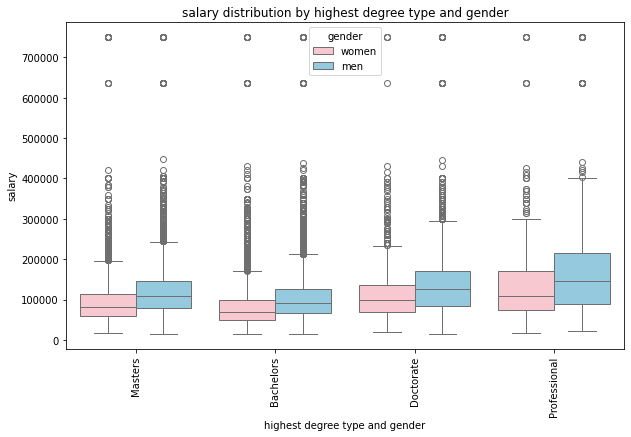

In [ ]:
# box plot for salary distribution by highest_degree_type and gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='highest_degree_type', y='salary', hue=data['gender'].replace({0: 'men', 1: 'women'}), data=data, palette={'men': 'skyblue', 'women': 'pink'})
plt.title('salary distribution by highest degree type and gender')
plt.suptitle('')
plt.xlabel('highest degree type and gender')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

**Description:** As seen before, this box plot shows the gender wage gap across all degree types as men tends to have higher median salaries than women, suggesting a consistent gender wage gap. Higher degrees (esp. professional degrees) are associated with higher salaries for both genders, but men still earn more within each category. The gender gap appears to be more pronounced for professional degrees, where men have significantly higher median salaries and a larger range of salaries, indicating potential disparities in high-paying roles for men vs. women in professional fields.



### Salary and Having a Leadership Role



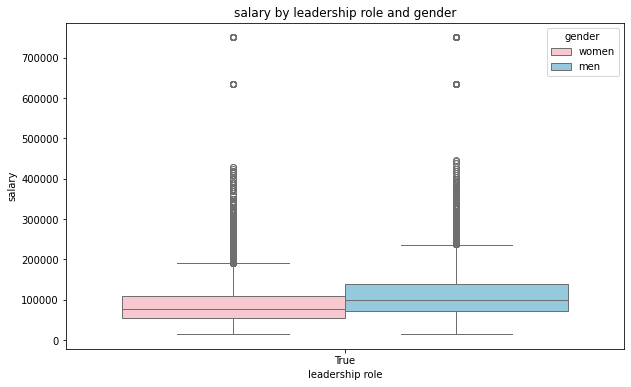

In [ ]:
data['is_leader'] = data['leadership_job_titles'] != 'non_leadership'

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='is_leader', y='salary', hue=data['gender'].replace({0: 'men', 1: 'women'}), palette={'men': 'skyblue', 'women': 'pink'})
plt.title('salary by leadership role and gender')
plt.xlabel('leadership role')
plt.ylabel('salary')
plt.show()

**Description:** The plot shows the distribution of salary in leadership roles by gender. The salary for both men and women has a wide range, but men have a slightly higher median salary compared to women in leadership roles, which suggests a potential gender disparity in salaries within the leadership roles. There is an indication that the majority of salaries are concentrated in a narrower range for both genders, with men showing a wider upper range. There are several outliers that suggest that some individuals (likely men) in leadership roles earn significantly higher than the typical range. The spread of salaries is wider for men which means there is more variability in men's salaries. Women have narrower salary ranges and a lower median salary which suggests they are less represented among the top earners in leadership positions.

The plot portrays a likely gender pay gap in leadership positions, with men generally earning more than women. The outliers show that high paying leadership roles are dominate by men.



### Gender Representation in Leadership Roles



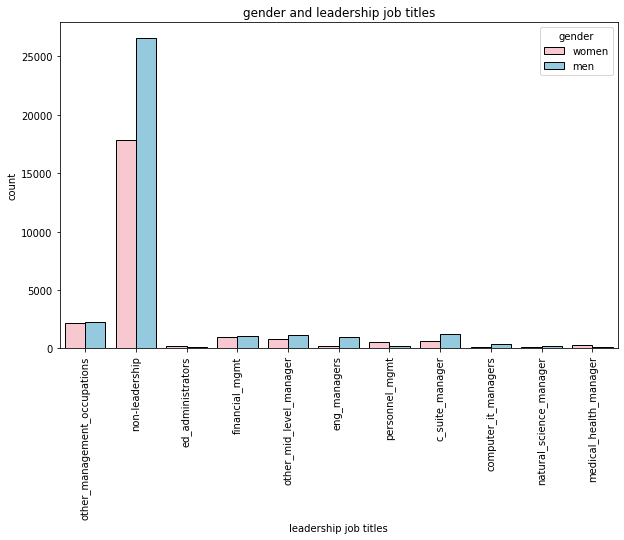

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='leadership_job_titles', hue=data['gender'].replace({0: 'men', 1: 'women'}), palette={'men': 'skyblue', 'women': 'pink'}, edgecolor='black')
plt.title('gender and leadership job titles')
plt.xlabel('leadership job titles')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(title='gender')
plt.show()

**Description:** The plot above shows the representation of gender in each leadership role, showing that men dominate the majority of leadership roles. Men (blue bars) outnumber women (pink bars) even in "non-leadership" roles, suggesting men are more represented in the overall workforce. Men also show dominant trends in higher-level technical and executive roles. In leadership jobs such as "medical/health manager" and personnel management, it shows closer counts for men and women which suggest more gender balance in these fields. This also reflects broader trends of women being more represented in healthcare and human resource fields.



In [ ]:
secbusiness = data[data['sector'] == 'business']
bachelorsdegree = data[data['highest_degree_type'] == 'Bachelors']

## Setting the Focus 

By targeting the **business sector** and individuals with **Bachelor's degrees**, this provides actionable insights into a specific context where gender and education intersect to influence career outcomes. The findings will shed light on the structural and societal factors driving wage inequities and offer evidence-based recommendations for fostering gender equity in the business workforce.

The business sector serves as an ideal context for analyzing salary disparities because it has a number of high paying leadership and executive roles. Within this sector, there is high earning potential, but there are gender disparities that make accessing these roles disproportionately limiting for women's earning potential. Women also face challenges in advancing to senior management roles ("glass ceiling"), which are more prevalent in this sector and tend to offer higher salaries. The business sector has historically been a male-dominated field that may disadvantage women in terms of networking and leadership opportunities. 

I have also chosen to focus on individuals with bachelor's degrees because this is often the basic level of education that is considered a minimum requirement for many roles within the business sector, which allows us to examine the gender disparities that persist even amongst similar educational qualifications when it comes to leadership roles. Bachelor's degrees are a good controlled educational baseline that minimizes confounding variables related to higher educational attainment (Master's and PhD's) which makes it easier to attribute salary differences to factors like gender and leadership roles. Bachelor's degrees are often the gateway to entry-level roles that can lead to leadership positions.



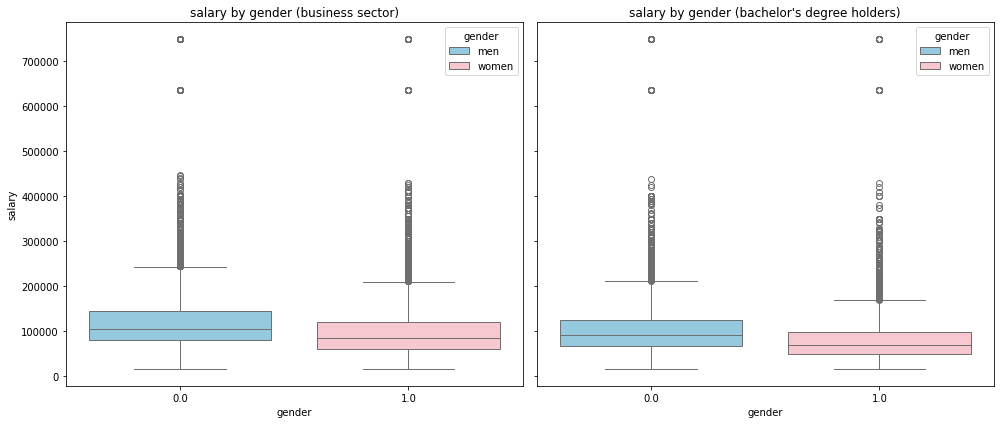

In [ ]:
# Set up the plot area with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot 1: Salary distribution by gender in the business sector
sns.boxplot(data=secbusiness, x='gender', y='salary', hue=data['gender'].replace({0: 'men', 1: 'women'}), palette={'men': 'skyblue', 'women': 'pink'}, ax=axes[0])
axes[0].set_title('salary by gender (business sector)')
axes[0].set_xlabel('gender')
axes[0].set_ylabel('salary')

# Plot 2: Salary distribution by gender for Bachelor's degree holders
sns.boxplot(data=bachelorsdegree, x='gender', y='salary', hue=data['gender'].replace({0: 'men', 1: 'women'}), palette={'men': 'skyblue', 'women': 'pink'}, ax=axes[1])
axes[1].set_title('salary by gender (bachelor\'s degree holders)')
axes[1].set_xlabel('gender')
axes[1].set_ylabel('')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Description:** In the box plot on the left, it visualizes the salary distribution by gender in specifically the business sector. It shows a higher median salary for men and higher maximum salaries compared to women. The upper whisker extends further for men which suggests that men generally have access to higher earning opportunities, even beyond the outliers. 

For the box plot on the right, it visualizes the salary distribution by gender for men and women who hold a bachelor's degree as their highest degree type. The median salary shows that men earn more which is consistent with broader trends in labor markets, even when controlling for educational attainment. The salary range is wider for men compared to women, indicated greater variability in salaries among men. The top 25% of men earn substantially more than the top 25% of women which shows a concentration of men in higher paying positions.



# Analysis



Variance Inflation Factors:
                                             Variable        VIF
0                                               const  21.316025
1                                              gender   1.017913
2          leadership_job_titles_computer_it_managers   1.206848
3                  leadership_job_titles_eng_managers   1.486210
4                leadership_job_titles_financial_mgmt   1.687958
5        leadership_job_titles_medical_health_manager   1.221542
6       leadership_job_titles_natural_science_manager   1.119143
7                leadership_job_titles_non-leadership   4.336052
8   leadership_job_titles_other_management_occupat...   2.517661
9       leadership_job_titles_other_mid_level_manager   1.656366
10               leadership_job_titles_personnel_mgmt   1.236995
Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.

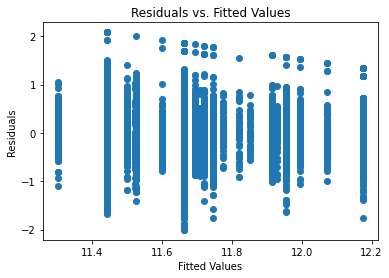

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.990
Model:                            WLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.034e+05
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        07:31:03   Log-Likelihood:                 600.00
No. Observations:               13494   AIC:                            -1178.
Df Residuals:                   13483   BIC:                            -1095.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import WLS


df = data[["salary", "gender", "leadership_job_titles"]].loc[
    (data["sector"] == 'business')
    & (~data["highest_degree_type"].str.contains("Bachelors", case=True, na=False))
]

columns_to_encode = ["leadership_job_titles"]

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded["log_salary"] = np.log(df_encoded["salary"])  # choose salary or earnings

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(["salary", "log_salary"], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
# Drop variables with high VIF values (>5 or >10)
# Example: df_encoded.drop(columns=['high_vif_variable'], inplace=True)
# Uncomment and replace 'high_vif_variable' with actual variable name if needed


# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(["salary", "log_salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type="HC3")
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

**Results:** For Variance Inflation Factors (VIF), the highest VIF is for non leadership roles at 4.34, but this is still below the standard threshold of 5, which means in this model, multicollinearity is not a major concern. The WLS model gives us a high r-squared value, which indicates that 99% of the variability in log_salary is explained by the model, suggesting a well fit model. The adjusted r squared confirms that the model is not overfit and the f-statistic is statistically significant overall. 

The coefficients represent the log-transformed salary change associated with the corresponding variable, holding other variables constant. Being a woman with a bachelor's degree is associated with a 21.95% lower salary compared to men with a bachelor's degree, which confirms a gender wage gap in the business sector, despite the same level of educational attainment. Within leadership and non-leadership roles, there are salary decreases which reflects a hierarchy in salary outcomes across roles. All variables are statistically significant indicating strong evidence that they contribute to explaining salary variability.

The cross-validated mean squared error (MSE) at .2204 is low which suggests a good predictive performance of the model.

The residuals appear to be randomly scattered around 0 indicating that the model does not show obvious patterns of bias, and that the linear model is a reasonable fit. There is no clear trend or curve suggesting that the linearity assumption is likely satisfied and that the residuals' variance may be constant (homoskedasticity). The range of residuals falls within -2 and 2 which indicates that the predictions are fairly accurate for most observations. 



### Checking for Homoskedasticity



In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# manually computing the residuals (ensure the model is fitted first)
if not hasattr(model, "coef_"):
    model.fit(X_train, y_train)
residuals = y - model.predict(X)

# adding a constant to the design matrix (X) for the intercept term
import statsmodels.api as sm

X_with_const = sm.add_constant(X)

# breusch-pagan test
bp_test = het_breuschpagan(residuals, X_with_const)

# test statistic and p-value
bp_statistic = bp_test[0]
bp_pvalue = bp_test[1]

print(f"breusch-pagan test stat: {bp_statistic}")
print(f"p-value: {bp_pvalue}")

# result
if bp_pvalue < 0.05:
    print(
        "the test suggests heteroscedasticity (non-constant variance) in the residuals"
    )
else:
    print(
        "the test does not suggest heteroscedasticity (constant variance) in the residuals"
    )

breusch-pagan test stat: 113.85615370587809
p-value: 8.88361197571406e-20
the test suggests heteroscedasticity (non-constant variance) in the residuals


**Results:** The test statistic is relatively large which indicates a substantial difference in the variance of residuals that could be explained by the independent variables. The p-value is very small compared to the typical significance level of 0.05, which means we reject the null hypothesis of residuals being homoskedastic, meaning they have constant variance. To conclude, there is heteroskedasticity (non-constant variance) in the residuals.



### Interpreting Exponentiated Coefficients



In [ ]:
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                                                 193746.644860
gender                                                     0.802885
leadership_job_titles_computer_it_managers                 0.903132
leadership_job_titles_eng_managers                         0.835713
leadership_job_titles_financial_mgmt                       0.634895
leadership_job_titles_medical_health_manager               0.701503
leadership_job_titles_natural_science_manager              0.782486
leadership_job_titles_non-leadership                       0.599473
leadership_job_titles_other_management_occupations         0.652279
leadership_job_titles_other_mid_level_manager              0.770994
leadership_job_titles_personnel_mgmt                       0.521717
dtype: float64


**Results:** The exponentiated coefficients represent the percentage change in salary. The base salary is approximately $193,746 at reference. Being a woman is associated with earning approximately 80.3% of the salary of a man, or a 19.7% decrease in salary relative to men. All leadership roles had a decrease in salary compared to the reference and specifically personnel management had the largest salary reduction which indicated that it may be undervalued compared to other leadership positions. Specialized roles like computer/IT managers and engineering managers experienced smaller reductions, reflecting their higher value in the market. 



hex_cell_77787974-c998-40dd-8c73-3143c5af5330.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coeff, x='roles', y='effect on salary', palette='Blues')


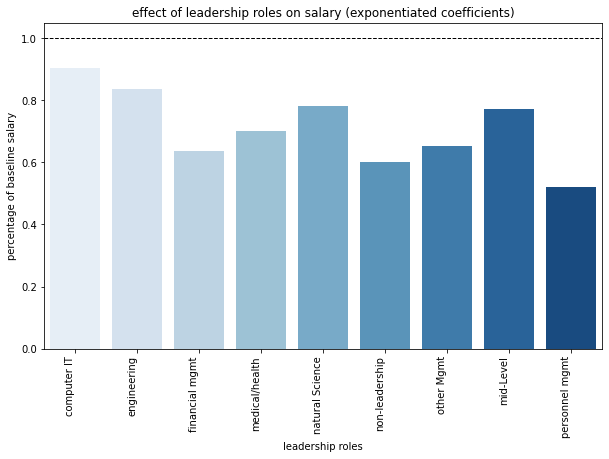

In [ ]:
coefficients = {'roles': ['computer IT', 'engineering', 'financial mgmt', 'medical/health', 
                          'natural Science', 'non-leadership', 'other Mgmt', 'mid-Level', 'personnel mgmt'],
                'effect on salary': [0.903132, 0.835713, 0.634895, 0.701503, 
                                     0.782486, 0.599473, 0.652279, 0.770994, 0.521717]}
df_coeff = pd.DataFrame(coefficients)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_coeff, x='roles', y='effect on salary', palette='Blues')
plt.axhline(1, color='black', linestyle='--', linewidth=1)  # reference line for no effect
plt.title('effect of leadership roles on salary (exponentiated coefficients)')
plt.ylabel('percentage of baseline salary')
plt.xlabel('leadership roles')
plt.xticks(rotation=90, ha='right')
plt.show()

### Conducting a Mediation Analysis



In [ ]:
X = df_encoded.drop(["salary", "log_salary"], axis=1)
y = df_encoded["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

leadership_dummies = [
    col for col in df_encoded.columns if col.startswith("leadership_job_titles")
]  # replace with principal_job with your prefix for your categorical variable
X_no_mediator = X_train.drop(columns=leadership_dummies)
X_no_mediator = sm.add_constant(X_no_mediator)

model_no_mediator = sm.OLS(y_train, X_no_mediator).fit()
gender_effect_no_mediator = model_no_mediator.params[
    "gender"
]  # Coefficient of gender without mediator

X_with_mediator = sm.add_constant(X_train)
model_with_mediator = sm.OLS(y_train, X_with_mediator).fit()
gender_effect_with_mediator = model_with_mediator.params[
    "gender"
]  # Coefficient of gender with mediator

explained_percent = (
    (gender_effect_no_mediator - gender_effect_with_mediator)
    / gender_effect_no_mediator
) * 100

print(f"Gender effect without mediator: {gender_effect_no_mediator}")
print(f"Gender effect with mediator: {gender_effect_with_mediator}")
print(f"Percentage of gender gap explained by leadership roles: {explained_percent:.2f}%")

Gender effect without mediator: -0.22845231641820127
Gender effect with mediator: -0.21938820996855785
Percentage of gender gap explained by leadership roles: 3.97%


**Result:** This mediation analysis explores the role of leadership roles as a potential mediator in the relationship between gender and salary outcomes. When leadership roles are not considered, being a woman is associated with earning about 22.8% less than a man. When leadership roles are considered, the gender effect on salary decreases to 21.9% less, representing a direct effect of gender on salary, after accounting for the mediating influence of leadership roles. Leadership roles account for about 3.97% of the gender pay gap which means that leadership roles have a modest mediating effect, slightly reducing the overall disparity between men and women's salaries. 

While leadership roles contribute to gender disparities, other factors likely still play a larger role. Even after accounting for leadership roles, 96% of the gender wage gap remains unexplained. Gender has a direct effect on salary outcomes, even without considering leadership positions. But, leadership roles still matter as they contribute to salary disparities highlighting the importance of representation in leadership positions. Women may face barriers in accessing these roles which can further exacerbate the gender wage gap. 



# Conclusion

The analysis highlights significant insights into the relationship between gender, leadership roles, and salary disparities within the business sector, focusing on individuals with a Bachelor’s degree as their highest educational attainment. Women with bachelor's degrees earn approximately 19.7% less than men with the same level of educational attainment, even after accounting for leadership roles and other factors. Leadership roles explain only 3.97% of the gender pay gap, suggesting that broader systemic factors, such as occupational segregation, biases, and differences in career progression opportunities, play a much larger role. Leadership roles vary significantly in their impact on salaries, with high-paying positions like computer/IT managers and engineering managers exhibiting smaller salary reductions compared to the baseline category. In contrast, non-leadership roles and personnel management are associated with 40% and 47.8% lower salaries, respectively, reflecting undervaluation of these roles. The uneven distribution of men and women across these roles further contributes to the wage gap, with men overrepresented in high-paying positions.

The Breusch-Pagan test confirmed heteroskedasticity, indicating that the variability of residuals is not constant across salary levels. This suggests that the factors influencing salary disparities are more pronounced at higher salary levels, where men are disproportionately represented. However, multicollinearity is not a significant concern, as all variance inflation factors (VIFs) are below the acceptable threshold of 5, validating the robustness of the regression model. Furthermore, the regression model explains 99% of the variance in log-transformed salaries (r-squared = 0.99), confirming that the predictors—gender, leadership roles, and others—effectively capture the primary drivers of salary variability.

The findings have several implications. Despite accounting for leadership roles and educational attainment, the wage gap persists, indicating deep-rooted systemic inequities. Policies addressing gender biases in hiring, promotion, and compensation are essential to closing this gap. Women remain underrepresented in high-paying leadership positions such as IT and engineering management. Promoting women’s participation in these fields, coupled with targeted mentorship and leadership development initiatives, could help reduce salary disparities. Additionally, specialized roles like computer/IT managers and engineering managers command higher salaries, suggesting that encouraging women to pursue technical and specialized career paths can improve equity. Roles like personnel management and non-leadership positions, which are often undervalued, should be fairly compensated, as they are disproportionately occupied by women. Leadership positions and their associated pay scales are critical levers for reducing the gender wage gap in the business sector, but broader cultural and structural barriers, including unconscious bias, representation in decision-making roles, and equitable distribution of opportunities, must also be addressed.

To address these challenges, organizations should introduce robust pay equity policies, including regular pay audits and transparent salary structures, to ensure men and women are compensated equitably for equivalent roles and responsibilities. Mentorship and sponsorship programs should be implemented to support women’s progression into leadership roles, particularly in technical and high-paying fields such as IT and engineering management. Additionally, organizations should reexamine undervalued roles, such as personnel management, to ensure pay aligns with their organizational contributions. To address the variability in residuals (heteroskedasticity), robust standard errors should be used in future analyses, and policies should target inequities across the entire salary distribution, including both lower and higher earners. Further research should examine how additional factors, such as work experience, geographic location, and industry-specific dynamics, interact with gender and leadership roles to influence salary outcomes.

In conclusion, the analysis underscores the multifaceted nature of the gender wage gap in the business sector amongst individuals with a bachelor's degree. While leadership roles play a role in explaining salary disparities, the persistence of a substantial gender effect indicates that broader systemic factors need to be addressed. Organizations must not only promote women into leadership positions but also ensure equitable pay and opportunities across all occupational roles to build a more inclusive and fair workplace.

